In [ ]:
%matplotlib inline

# Quantum Gate Building Playground

## What are Quantum Gates?

**Quantum gates** are the building blocks of quantum circuits, just like logic gates (AND, OR, NOT) are the building blocks of classical circuits.

### Key Differences:

**Classical Gates:**
- Manipulate bits (0 or 1)
- Often irreversible (e.g., AND gate loses information)
- Examples: AND, OR, NOT, XOR

**Quantum Gates:**
- Manipulate qubits (superposition and entanglement)
- Always **reversible** (unitary transformations)
- Can create and manipulate superposition
- Can create entanglement between qubits

## Common Quantum Gates

Let's explore the most important quantum gates!

In [1]:
# Import Qiskit
from qiskit import QuantumCircuit

## Single-Qubit Gates

These gates operate on individual qubits.

### 1. Hadamard Gate (H)
- **Purpose:** Creates equal superposition
- **Action:** $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
- **Use case:** Starting point for many quantum algorithms

### 2. Pauli-X Gate (X)
- **Purpose:** Quantum NOT gate (bit flip)
- **Action:** $X|0\rangle = |1\rangle$ and $X|1\rangle = |0\rangle$
- **Use case:** Flipping qubit states

### 3. Pauli-Y Gate (Y)
- **Purpose:** Rotation around Y-axis + bit flip
- **Action:** $Y|0\rangle = i|1\rangle$ and $Y|1\rangle = -i|0\rangle$
- **Use case:** Combined rotation and flip

### 4. Pauli-Z Gate (Z)
- **Purpose:** Phase flip (doesn't change |0⟩ or |1⟩ basis, but changes phase)
- **Action:** $Z|0\rangle = |0\rangle$ and $Z|1\rangle = -|1\rangle$
- **Use case:** Phase manipulation

## Two-Qubit Gates (Entangling Gates)

These gates operate on pairs of qubits and can create **entanglement**!

### 1. CNOT Gate (CX)
- **Purpose:** Controlled-NOT, the most important 2-qubit gate
- **Action:** Flips target qubit IF control qubit is |1⟩
- **Notation:** `cx(control, target)`
- **Use case:** Creating entanglement, quantum error correction

**Truth Table:**
| Control | Target | → | Control | Target |
|---------|--------|---|---------|--------|
| 0       | 0      | → | 0       | 0      |
| 0       | 1      | → | 0       | 1      |
| 1       | 0      | → | 1       | 1      | (flipped!)
| 1       | 1      | → | 1       | 0      | (flipped!)

### 2. Controlled-Z Gate (CZ)
- **Purpose:** Applies Z gate to target IF control is |1⟩
- **Action:** Adds phase flip when both qubits are |1⟩
- **Notation:** `cz(control, target)`
- **Use case:** Phase-based quantum algorithms

Let's build a circuit using all these gates!

In [2]:
# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply single-qubit gates
qc.h(0)      # Hadamard on qubit 0 → creates superposition
qc.x(1)      # X gate on qubit 1 → flips |0⟩ to |1⟩
qc.y(2)      # Y gate on qubit 2 → rotation + flip

# Apply two-qubit gates (these create entanglement!)
qc.cx(0, 1)  # CNOT: qubit 0 controls qubit 1
qc.cz(1, 2)  # Controlled-Z: qubit 1 controls qubit 2

# Measure all qubits
qc.measure_all()

# Display the circuit
print("🎮 Quantum Gate Playground Circuit:")
print("="*60)
print(qc.draw())
print("="*60)

🎮 Quantum Gate Playground Circuit:
        ┌───┐         ░ ┌─┐      
   q_0: ┤ H ├──■──────░─┤M├──────
        ├───┤┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ┤ X ├┤ X ├─■──░──╫─┤M├───
        ├───┤└───┘ │  ░  ║ └╥┘┌─┐
   q_2: ┤ Y ├──────■──░──╫──╫─┤M├
        └───┘         ░  ║  ║ └╥┘
   c: 3/═════════════════╬══╬══╬═
                         ║  ║  ║ 
meas: 3/═════════════════╩══╩══╩═
                         0  1  2 


## Understanding the Circuit

Let's trace through what happens to each qubit:

### Qubit 0 (q₀):
1. **Start:** $|0\rangle$
2. **After H:** $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ - in superposition!
3. **After CNOT:** Acts as control for qubit 1 (creates entanglement)

### Qubit 1 (q₁):
1. **Start:** $|0\rangle$
2. **After X:** $|1\rangle$ - flipped to 1
3. **After CNOT:** Target of qubit 0's control (gets entangled with q₀)
4. **After CZ:** Acts as control for qubit 2

### Qubit 2 (q₂):
1. **Start:** $|0\rangle$
2. **After Y:** $i|1\rangle$ - rotated and flipped with phase
3. **After CZ:** Target of qubit 1's control (phase relationship)

### Circuit Flow:
```
q₀: |0⟩ ─H─●─────── (superposition, then controls q₁)
           │
q₁: |0⟩ ─X─X─●───── (flipped, entangled, then controls q₂)
             │
q₂: |0⟩ ─Y───Z───── (Y-rotated, phase-controlled)
```

The qubits are now in a complex entangled state! 🔗

## Let's Run It and See the Results!

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Run the circuit
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Display results
print(" Measurement Results (1000 shots):")
print("="*60)
for state, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / 1000) * 100
    print(f"   |{state}⟩: {count:4d} times ({percentage:5.1f}%)")
print("="*60)
print("\nNotice the distribution of different states!")
print("This shows the complex quantum state created by the gates.")

📊 Measurement Results (1000 shots):
   |101 000⟩:  502 times ( 50.2%)
   |110 000⟩:  498 times ( 49.8%)

Notice the distribution of different states!
This shows the complex quantum state created by the gates.


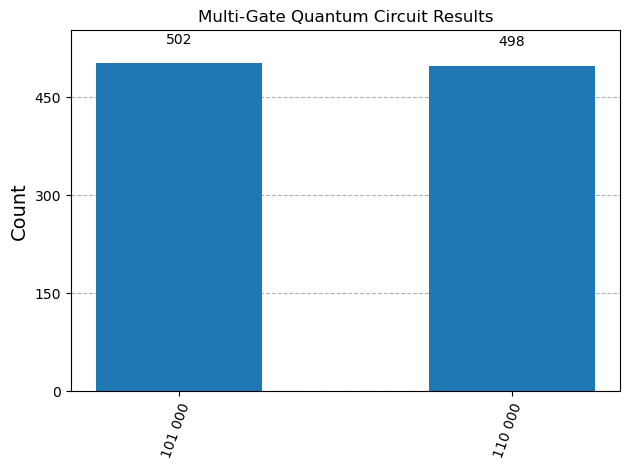

In [4]:
# Visualize the results
plot_histogram(counts, title='Multi-Gate Quantum Circuit Results')

## Gate Summary Reference

### Single-Qubit Gates

| Gate | Symbol | Effect | Use Case |
|------|--------|--------|----------|
| **H** (Hadamard) | H | Creates superposition | Algorithm initialization |
| **X** (Pauli-X) | X | Bit flip (NOT) | State preparation |
| **Y** (Pauli-Y) | Y | Bit flip + phase | Combined operations |
| **Z** (Pauli-Z) | Z | Phase flip | Phase manipulation |
| **S** | S | √Z gate | Precision phase control |
| **T** | T | ∜Z gate | Fault-tolerant computing |

### Two-Qubit Gates

| Gate | Symbol | Effect | Use Case |
|------|--------|--------|----------|
| **CNOT** (CX) | ●─X | Controlled bit flip | Entanglement, error correction |
| **CZ** | ●─Z | Controlled phase flip | Phase-based algorithms |
| **SWAP** | ×─× | Exchange qubit states | Qubit routing |

### Gate Properties

**All quantum gates are reversible** (unitary)  
**Gates preserve quantum information**  
**Multiple gates can be composed**  
**Order matters!** (gates don't always commute)

---

## Experiment Ideas

Now that you understand the basics, try these experiments:

1. **Remove the CNOT gate** - How does this affect the results?
2. **Add another Hadamard on qubit 1** after the X gate - What happens?
3. **Swap the order of gates** - Does it change the outcome?
4. **Create a Bell state** - Use H on q₀, then CNOT(0,1) - What states do you get?

Remember: Quantum circuits are all about **experimenting** and **building intuition**!